In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from updates import HebbianUpdate, BasicHebbianUpdate, OjaUpdate, SubtractiveNormUpdate, BCMUpdate
from hebbian import Hebbian

In [2]:
df=pd.read_csv('../dataset/lab2_1_data.csv', header=None)
 
df = df.T
df.head()
data = df.values
data.shape

(100, 2)

## Visualize the Data

Here, we simply ploy the data with a scatter plot. Because we know that the Hebbian learning rule converges to the principal singular vector(s), we also plot the two eigenvectors of the correlation matrix

[[ 1.         -0.79945262]
 [-0.79945262  1.        ]]
[1.79945262 0.20054738]
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


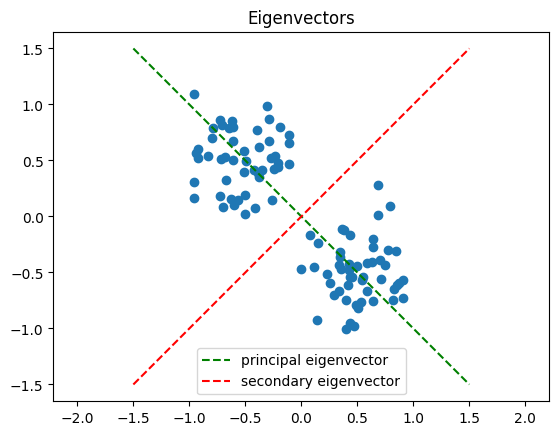

In [3]:
# correlation matrix
corr = np.corrcoef(data.T)
print(corr)
# eigen decomposition
eig_vals, eig_vecs = np.linalg.eig(corr)
print(eig_vals)
print(eig_vecs)

def plot_eigenvectors(data, eig_vecs):
    # plot the data
    plt.scatter(data[:,0], data[:,1])
    # plot the eigenvectors
    principal_eigenvector = eig_vecs[:,0]
    secondary_eigenvector = eig_vecs[:,1]

    # plot the eigenvectors
    #plt.quiver(0, 0, principal_eigenvector[0], principal_eigenvector[1], scale= 2, scale_units='xy', angles='xy', color='g', label='principal eigenvector')
    #plt.quiver(0, 0, secondary_eigenvector[0], secondary_eigenvector[1], scale=2, scale_units='xy', angles='xy', color='r', label='secondary eigenvector')
    # plot eigenvectors lines
    x = np.linspace(-1.5, 1.5, 100)
    y = principal_eigenvector[1]/principal_eigenvector[0] * x
    plt.plot(x, y, color='g', linestyle='--', label='principal eigenvector')
    y = secondary_eigenvector[1]/secondary_eigenvector[0] * x
    plt.plot(x, y, color='r', linestyle='--', label='secondary eigenvector')
    
    plt.title('Eigenvectors')
    plt.legend()
    plt.axis('equal')
plot_eigenvectors(data, eig_vecs)
plt.show()

## Basic Hebbian Rule
The first rule we apply is the standard hebbian rule
$w(t) = w(t-1) + \eta vu$, where $u$ is the input and $v=w(t-1)^Tu$, and $\eta$ plays the role of the learning rate.

In [4]:
update_func = BasicHebbianUpdate()

hebbian_net = Hebbian(2, update_func=update_func)
ws = hebbian_net.train(data,  eta =0.01, epochs=100)

print('Final weight w:',hebbian_net.w)

Final weight w: [[ 8.24696093e+24 -8.16704180e+24]]


As we can see, with the basic hebbian update, in 100 epochs the norm of the weight vector has exploded. 
Let's see if the vecotr has converged to the principal eigenvector:

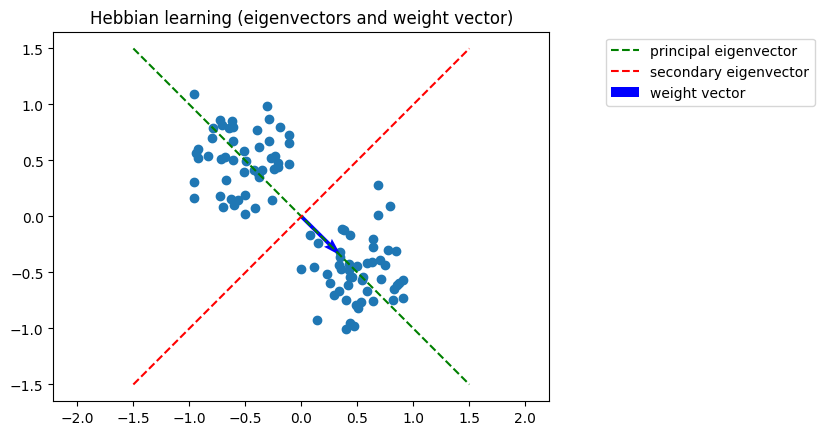

In [5]:
# plot the data
plot_eigenvectors(data, eig_vecs)
# plot the weight vector
norm_w = hebbian_net.w / np.linalg.norm(hebbian_net.w) 
plt.quiver(0, 0, norm_w[0,0], norm_w[0,1], scale=2, scale_units='xy', angles='xy', color='b', label='weight vector')
ax= plt.gca()
plt.legend(bbox_to_anchor=(1.1, 1), bbox_transform=ax.transAxes)
plt.axis('equal')
plt.title('Hebbian learning (eigenvectors and weight vector)')
plt.show()

We can also visualize the evolution of the weights over each step:
In the picture we have plotted the two components separately, and the norm of the vector $w$.

(10000, 2)


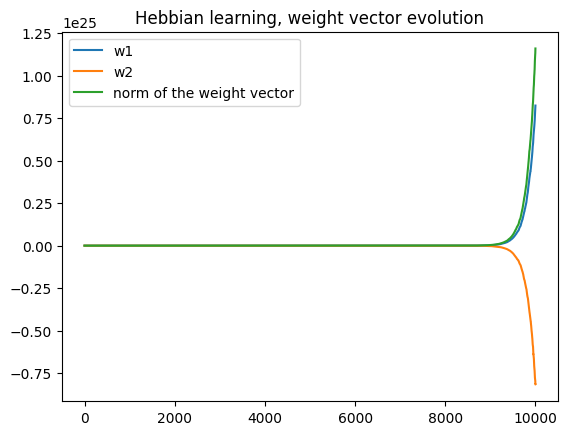

In [6]:
print(ws.shape)
plt.plot(ws[:,0], label='w1')
plt.plot(ws[:,1], label='w2')
plt.plot(np.linalg.norm(ws, axis=1), label='norm of the weight vector')
plt.legend()
plt.title('Hebbian learning, weight vector evolution')
plt.show()

## Oja update
Oja update imposes a constraint on the norm of the weight vector: we impose a regularization term $-\alpha v^2w$. 

Here, $\alpha$ is a hyperparameter. 

In this way, we can make the rule stable in a dynamical sense: $\|w\|^2$ will converge to $1/\alpha$.


In [7]:
update_func = OjaUpdate(alpha=2)

oja_net = Hebbian(2, update_func=update_func)

ws_oja = oja_net.train(data,  eta =0.01, epochs=10)
# squared norm of the weight vector
np.linalg.norm(oja_net.w)**2

0.5002709048502594

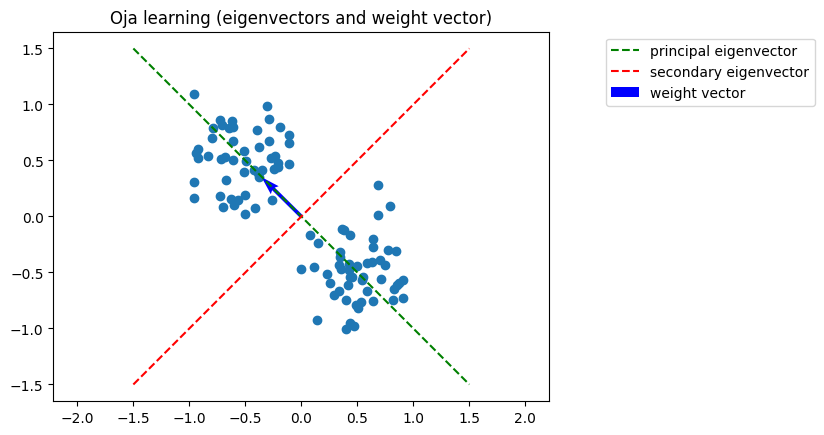

In [8]:
# plot the data
plot_eigenvectors(data, eig_vecs)
# plot the weight vector
norm_w = oja_net.w / np.linalg.norm(oja_net.w)
plt.quiver(0, 0, norm_w[0,0], norm_w[0,1], scale=2, scale_units='xy', angles='xy', color='b', label='weight vector')
ax= plt.gca()
plt.legend(bbox_to_anchor=(1.1, 1),
              bbox_transform=ax.transAxes)
plt.axis('equal')
plt.title('Oja learning (eigenvectors and weight vector)')
plt.show()

Looking at the evolution of the vector, we can clearly see that the vector norm converges to a value.

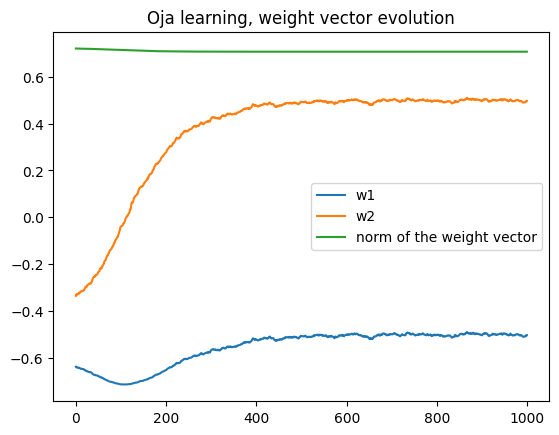

In [9]:
plt.plot(ws_oja[:,0], label='w1')
plt.plot(ws_oja[:,1], label='w2')
plt.plot(np.linalg.norm(ws_oja, axis=1), label='norm of the weight vector')
plt.legend()
plt.title('Oja learning, weight vector evolution')
plt.show()

## Subtractive Nornalization

Subtractive normalization imposes a constraint on the sum of the weights, that cannot change at all. 
Although this may sound reasonable, this rule is still instable, because one component of the weight vector may converge to $-\infty$, and another component to $+\infty$, balancing themselves out.

In [25]:
update_func = SubtractiveNormUpdate()

sn_net = Hebbian(2, update_func=update_func)
ws_sn = sn_net.train(data, 0.01, 10)  



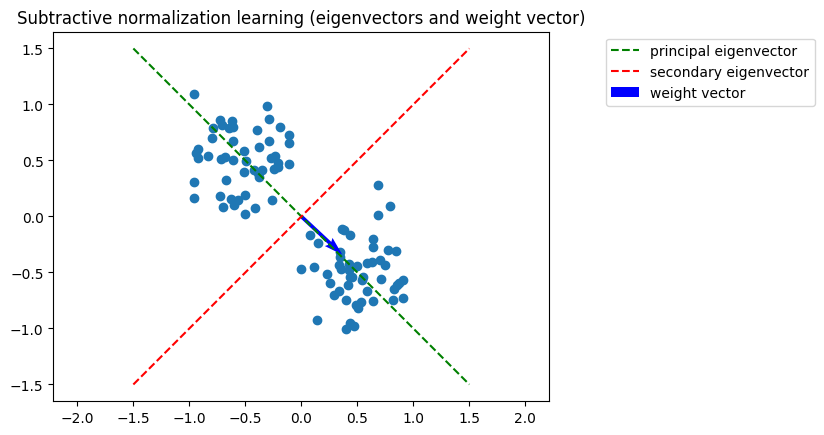

In [26]:
# plot the data
plot_eigenvectors(data, eig_vecs)
# plot the weight vector
norm_w = sn_net.w / np.linalg.norm(sn_net.w)
plt.quiver(0, 0, norm_w[0,0], norm_w[0,1], scale=2, scale_units='xy', angles='xy', color='b', label='weight vector')
ax= plt.gca()
plt.legend(bbox_to_anchor=(1.1, 1), bbox_transform=ax.transAxes)
plt.axis('equal')
plt.title('Subtractive normalization learning (eigenvectors and weight vector)')
plt.show()

In the plots we can clearly see that the norm of the weight vector still goes to $+\infty$. 
We can also see that the sum of the two components stays constant. 

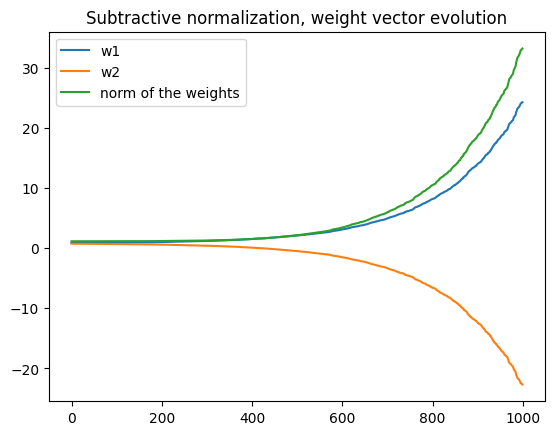

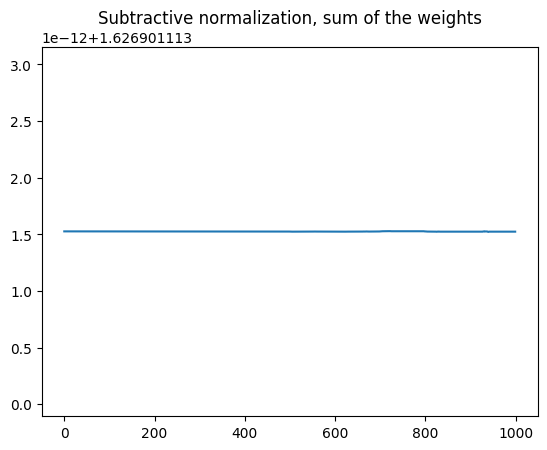

In [27]:

plt.plot(ws_sn[:,0], label='w1')
plt.plot(ws_sn[:,1], label='w2')
plt.plot(np.linalg.norm(ws_sn, axis=1), label='norm of the weights')
plt.legend()
plt.title('Subtractive normalization, weight vector evolution')
plt.show()

plt.plot(np.sum(ws_sn, axis=1), label='sum of the weights')
plt.title('Subtractive normalization, sum of the weights')
plt.show()


### BCM Update
BCM Update imposes a threshold on the strenght of post-synaptic signal $v$. 


In [13]:
update_func = BCMUpdate(0.5, 0.01)

bcm_net =Hebbian(2, update_func)

ws = bcm_net.train(data, eta=0.01, epochs =100)
    

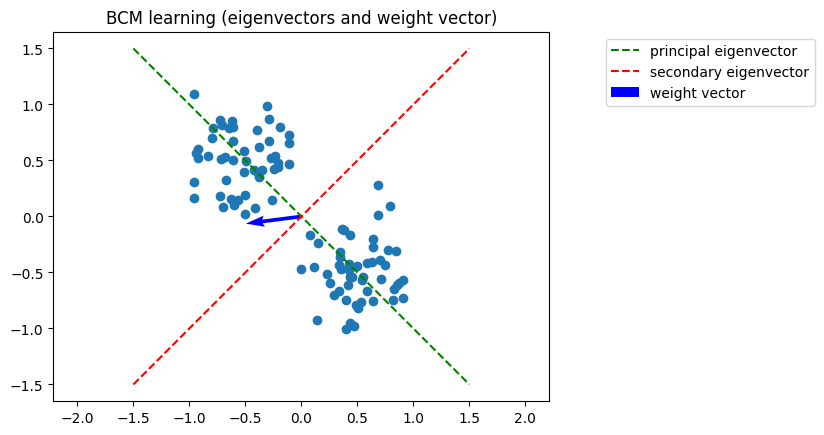

In [14]:
plot_eigenvectors(data, eig_vecs)
# plot the weight vector
norm_w = bcm_net.w / np.linalg.norm(bcm_net.w)
plt.quiver(0, 0, norm_w[0,0], norm_w[0,1], scale=2, scale_units='xy', angles='xy', color='b', label='weight vector')
ax= plt.gca()
plt.legend(bbox_to_anchor=(1.1, 1), bbox_transform=ax.transAxes)
plt.axis('equal')
plt.title('BCM learning (eigenvectors and weight vector)')
plt.show()


Notably, we can see that in this case the weight $w$ seems to converge to the secondary eigenvector of the correlation matrix.

Plotting the evolution of the weight, we can see that with a quadratic update for $\theta$, the rule is stable.

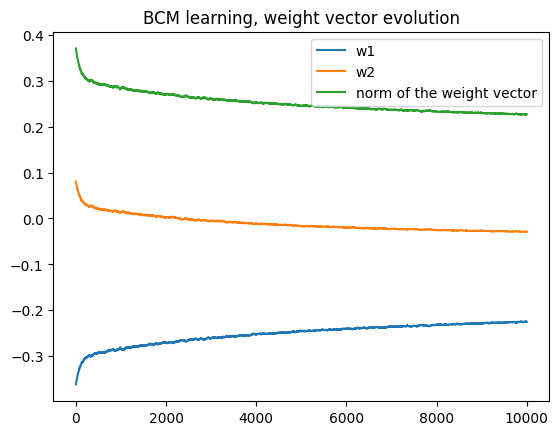

In [15]:
plt.plot(ws[:,0], label='w1')
plt.plot(ws[:,1], label='w2')
plt.plot(np.linalg.norm(ws, axis=1), label='norm of the weight vector')
plt.title('BCM learning, weight vector evolution')
plt.legend()
plt.show()

## Convariance Rule

Lastly we implement the covariance rule. 

In [16]:
class CovarianceRule():
    def __init__(self, dim) -> None:
        self.w = (np.random.rand(1, dim) - 0.5) * 2 # weight vector in range [-1, 1]

    def train(self, data, eta, n_epochs, update, theta=None):
        # shuffle the data
        np.random.shuffle(data)
        u_bar = np.mean(data, axis=0)
        
        ws = []
       
        for epoch in range(n_epochs):
            
            for u in data:
                # w<- Cw
                if update =='covariance matrix':
                    C = np.outer(u - u_bar, u - u_bar)
                    self.w += eta*(C @ self.w.T).T
                # w<- w + v*(u-theta_u)
                elif update == 'u':
                    if theta is None:
                        theta = u_bar
                    v = np.dot(self.w, u.T)
                    self.w+= eta* v* (u - theta)
                # w<- w + (v -theta_v)*u
                elif update == 'v':
                    v_bar = np.dot(self.w, u_bar.T)
                    if theta is None:
                        theta = v_bar
                    v = np.dot(self.w, u.T)
                    self.w+= eta* (v - theta)* u

                    
                ws.append(self.w.copy())
        return np.array(ws).squeeze()

Let's try the implemenation that uses the covariance matrix:

In [17]:
cov_net = CovarianceRule(2)
ws = cov_net.train(data, 0.01, 20, 'covariance matrix')

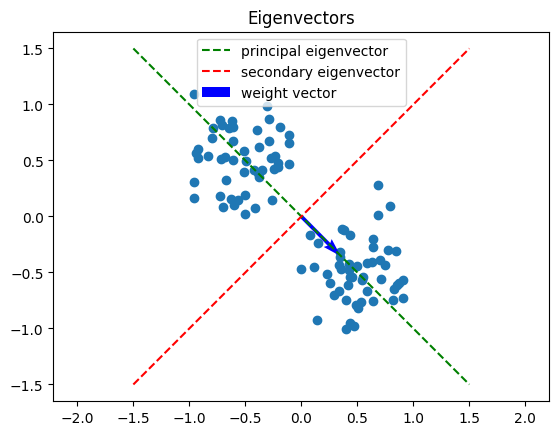

In [18]:
plot_eigenvectors(data, eig_vecs)
# plot the weight vector
norm_w = cov_net.w / np.linalg.norm(cov_net.w)
plt.quiver(0, 0, norm_w[0,0], norm_w[0,1], scale=2, scale_units='xy', angles='xy', color='b', label='weight vector')
plt.legend()
plt.show()


Text(0.5, 1.0, 'Covariance rule learning, weight vector evolution')

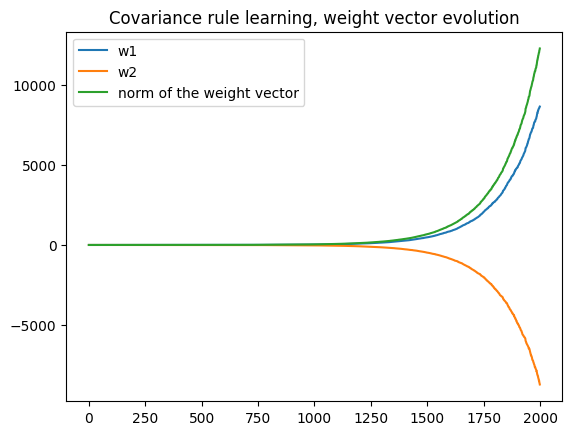

In [19]:
plt.plot(ws[:,0], label='w1')
plt.plot(ws[:,1], label='w2')
plt.plot(np.linalg.norm(ws, axis=1), label='norm of the weight vector')
plt.legend()
plt.title('Covariance rule learning, weight vector evolution')